In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [155]:
# 1. Data Exploration and Understanding:
# 1.1 Dataset Overview:

df = pd.read_csv('WHR-2024-5CS037.csv')

In [157]:
# 1.1.1 Load the dataset and display the first 10 rows.

print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [159]:
# 1.2 Identify the number of rows and columns in the dataset.
# Displaying the number of rows and columns in the dataset using df.shape.
rows, columns = df.shape
print(f"\nNumber of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 143
Number of columns: 9


In [161]:
# 1.3 List all the columns and their data types.
# Listing the columns and their data types using df.dtypes
print("\nColumns and their data types:")
print(df.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [163]:
# 1.2 Basic statisics
# 1.2.1 Calculate the mean, median, and standard deviation for the Score column.
# Calculating the statistical values (mean, median, standard deviation) for the 'score' 
# column to understand the distribution of happiness scores.
mean = df['score'].mean()
median = df['score'].median()
std = df['score'].std()
print(f"\nScore Statistics:\nMean: {mean}, Median: {median}, Standard Deviation: {std}")



Score Statistics:
Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [165]:
# 1.2.2 Identify the country with the highest and lowest happiness scores.
# Using  id.max() and id_min() to  identify and display highest and lowest happiness 
# score.
# For highest happiness score
high_score_country = df.loc[df['score'].idxmax(), 'Country name']

# for lowest happiness score
low_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"\nCountry with highest happiness score: {high_score_country}")
print(f"Country with lowest happiness score: {low_score_country}")



Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


In [167]:
# 1.3 Missing Values:
# 1.3.1. Check if there are any missing values in the dataset. If so, display the total count for each column
# Using df.isnull().sum() to identify and display columns with missing values if any.
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values[missing_values > 0])


Missing values in the dataset:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [169]:
# 1.4. Filtering and Sorting:
# 1.4.1. Filter the dataset to show only the countries with a Score greater than 7.5.
# A filter is applied to show only countries with a happiness score greater than 7.5
filtered_dataset = df[df['score'] > 7.5]
print("\nCountries with Score > 7.5:")
print(filtered_dataset)





Countries with Score > 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [171]:
# 1.4.2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

sort_dataset = filtered_dataset.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries by GDP per capita (score > 7.5):")
print(sort_dataset.head(10))




Top 10 countries by GDP per capita (score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [173]:
# 1.5. Adding New Columns:
# 1.5.1 Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nAdded 'Happiness Category' column:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))



Added 'Happiness Category' column:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


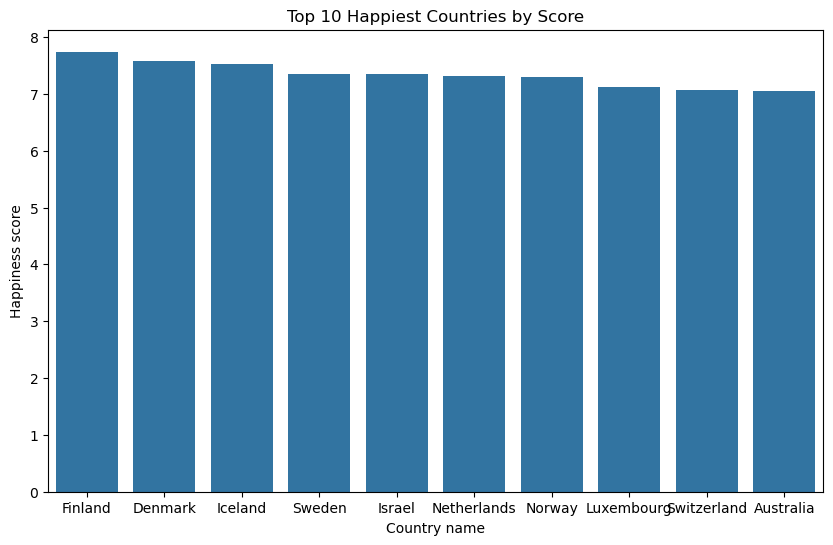

In [175]:
# 2. Data Visualizations:
# 2.1 Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='Country name', y='score')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country name')
plt.ylabel('Happiness score')
plt.show()

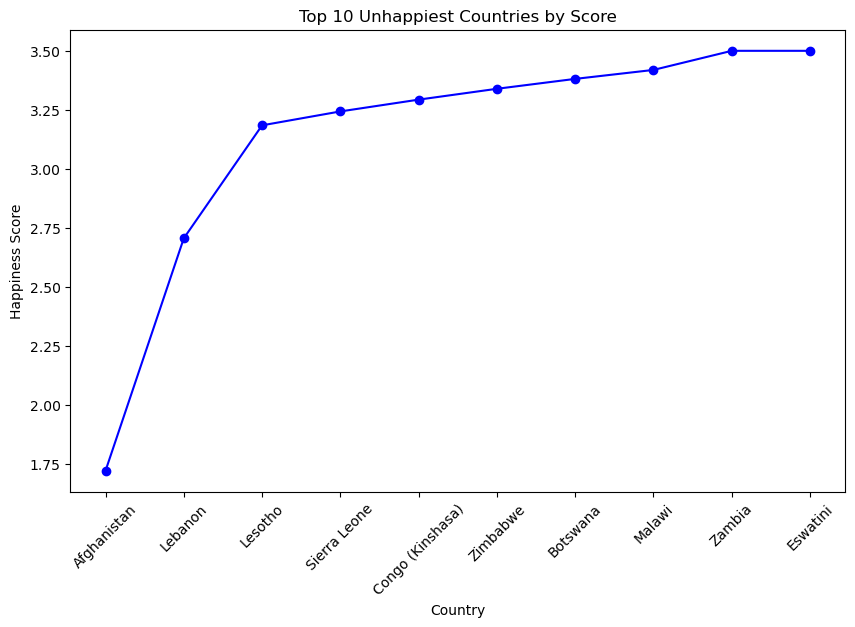

In [176]:
# 2.2 Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='blue')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

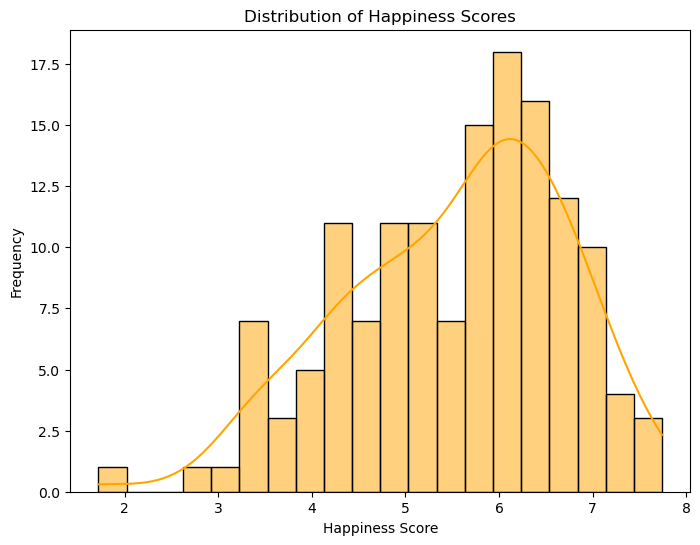

In [177]:
# 2.3. Plot a histogram for the Score column to show its distribution and also interpret.

plt.figure(figsize=(8, 6))
sns.histplot(df['score'], kde=True, bins=20, color='orange')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


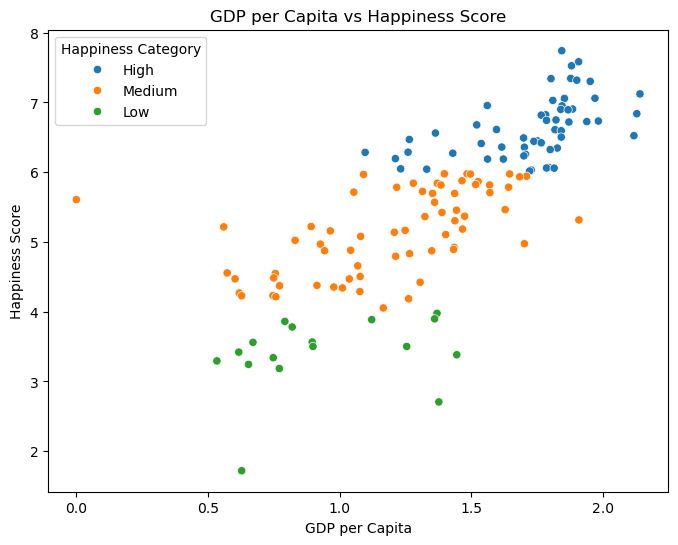

In [179]:
# 2.4. Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

In [181]:
# Problem - 2 - Some Advance Data Exploration Task:
# Task - 1 - Setup Task - Preparing the South-Asia Dataset:
# Steps:
# 1.1. Define the countries in South Asia with list

south_asia_countries = [
    'Nepal','Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 
    'Pakistan', 'Sri Lanka', 'Myanmar', 'Iran', 'Tajikistan', 'Uzbekistan', 
    'Turkmenistan', 'Kazakhstan', 'Kyrgyzstan', 'Armenia', 'Azerbaijan', 
    'Georgia', 'Turkey', 'Iraq', 'Saudi Arabia', 'Kuwait', 'Qatar', 'United Arab Emirates', 
    'Oman', 'Yemen'
]

In [183]:
# 1.2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

df1 = df[df['Country name'].isin(south_asia_countries)]


In [186]:
# 1.3. Save the filtered dataframe as separate CSV files for future use.

df1.to_csv('south_asia_filtered_data.csv', index=False)

print("Filtered DataFrame (df1) with South Asian countries:")
print(df1)

Filtered DataFrame (df1) with South Asian countries:
             Country name  score  Log GDP per capita  Social support  \
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
46             Uzbekistan  6.195               1.212           1.394   
48             Kazakhstan  6.188               1.622           1.457   
74             Kyrgyzstan  5.714               1.054           1.477   
81                Armenia  5.455               1.444           1.154   
87             Tajikistan  5.281                 NaN             NaN   
90                Georgia  5.185               1.467           0.990   
91                   Iraq  5.166               1.249           0.996   
92                  Nepal  5.158               0.965           0.990   
99                   Iran  4.923               1.435           1.136   
100        

In [189]:
# Task - 2 - Composite Score Ranking:
# Tasks:
# 2.1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics:

df1['Composite Score'] = (
        0.4 * df1['score'] +  # Weight for Happiness Score
        0.3 * df1['Log GDP per capita'] +   # Weight for GDP per Capita
        0.2 * df1['Social support'] +   # Weight for Social Support
        0.1 * df1['Healthy life expectancy']    # Weight for Life Expectancy
    )


print("Filtered DataFrame with Composite Score:")
print(df1[['Country name', 'Composite Score']])

Filtered DataFrame with Composite Score:
             Country name  Composite Score
12                 Kuwait           3.6728
21   United Arab Emirates           3.5772
27           Saudi Arabia           3.5135
46             Uzbekistan           3.1743
48             Kazakhstan           3.3088
74             Kyrgyzstan           2.9560
81                Armenia           2.9063
87             Tajikistan              NaN
90                Georgia           2.7645
91                   Iraq           2.6901
92                  Nepal           2.5950
99                   Iran           2.6840
100            Azerbaijan           2.6119
107              Pakistan           2.3356
117               Myanmar           2.2762
125                 India           2.1437
127             Sri Lanka           2.2619
128            Bangladesh           1.9921
132                 Yemen           1.9112
142           Afghanistan           0.9010


C:\Users\Xblade\AppData\Local\Temp\ipykernel_9636\149070153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Composite Score'] = (


In [191]:
# 2.2. Rank the South Asian countries based on the Composite Score in descending order.

df1 = df1.sort_values(by='Composite Score', ascending=False)
df1['Rank'] = range(1, len(df1) + 1)
print(df1[['Country name', 'Composite Score', 'Rank']])

             Country name  Composite Score  Rank
12                 Kuwait           3.6728     1
21   United Arab Emirates           3.5772     2
27           Saudi Arabia           3.5135     3
48             Kazakhstan           3.3088     4
46             Uzbekistan           3.1743     5
74             Kyrgyzstan           2.9560     6
81                Armenia           2.9063     7
90                Georgia           2.7645     8
91                   Iraq           2.6901     9
99                   Iran           2.6840    10
100            Azerbaijan           2.6119    11
92                  Nepal           2.5950    12
107              Pakistan           2.3356    13
117               Myanmar           2.2762    14
127             Sri Lanka           2.2619    15
125                 India           2.1437    16
128            Bangladesh           1.9921    17
132                 Yemen           1.9112    18
142           Afghanistan           0.9010    19
87             Tajik

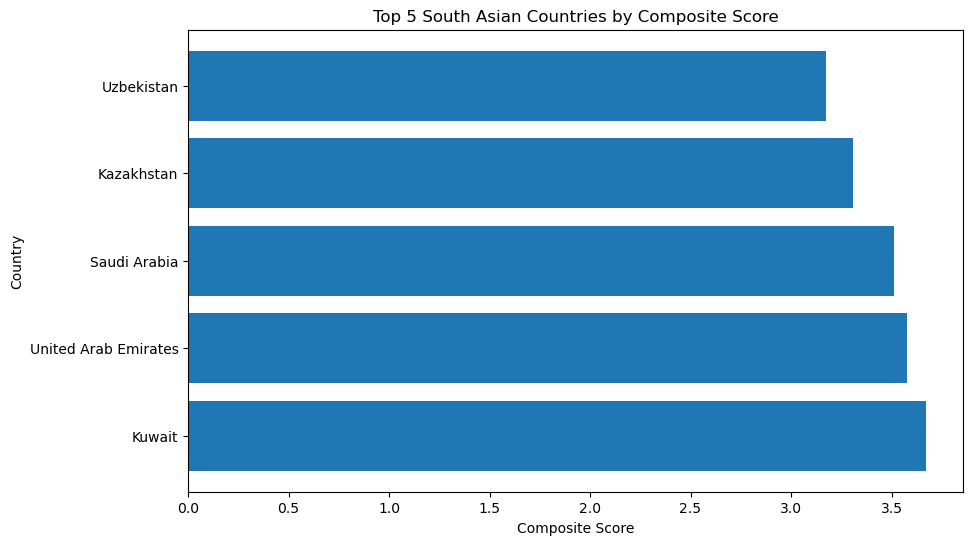

In [193]:
# 2.3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_countries = df1.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'])
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()


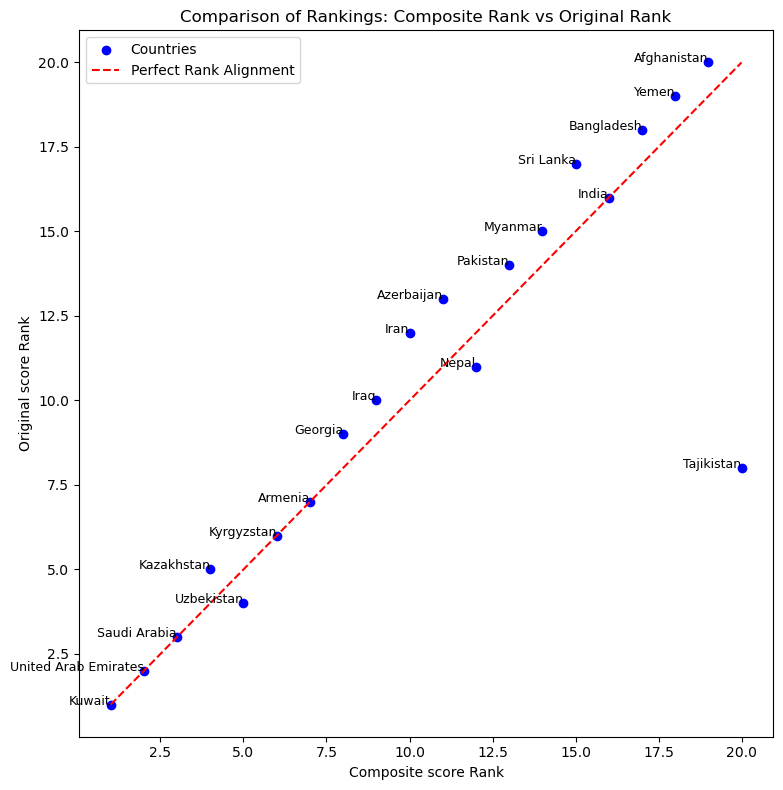

In [195]:
# 2.4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.
# Sort based on Composite Score and original Score
# Here, we can see the plot below which shows the comparison of rankings based on 
# composite score and original Score. It shows that the relationships between Generosity 
# and Happiness Score.
df1 = df1.sort_values(by='Composite Score', ascending=False)
df1['Composite score Rank'] = range(1, len(df1) + 1)

df1 = df1.sort_values(by='score', ascending=False)
df1['Original score Rank'] = range(1, len(df1) + 1)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(df1['Composite score Rank'], df1['Original score Rank'], color='blue', label='Countries')

ax.plot([df1['Composite score Rank'].min(), df1['Composite score Rank'].max()],
        [df1['Original score Rank'].min(), df1['Original score Rank'].max()],
        color='red', linestyle='--', label='Perfect Rank Alignment')

ax.set_xlabel('Composite score Rank')
ax.set_ylabel('Original score Rank')
ax.set_title('Comparison of Rankings: Composite Rank vs Original Rank')

for i, country in enumerate(df1['Country name']):
    ax.text(df1['Composite score Rank'].iloc[i], df1['Original score Rank'].iloc[i],
            df1['Country name'].iloc[i], fontsize=9, color='black', ha='right')

ax.legend()

plt.tight_layout()
plt.show()

In [196]:
# Task - 3 - Outlier Detection:
# Tasks:
# 3.1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
# The IQR (Interquartile Range) method is applied to detect outliers for both 
# happiness score and GDP per capita in South Asia. 

Q1_score = df1['score'].quantile(0.25)
Q3_score = df1['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = df1['Log GDP per capita'].quantile(0.25)
Q3_gdp = df1['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# 3.2. Define outliers using the 1.5 × IQR rule.
outliers_iqr = df1[((df1['score'] < (Q1_score - 1.5 * IQR_score)) | (df1['score'] > (Q3_score + 1.5 * IQR_score))) |
                   ((df1['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) | (df1['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp)))]

# Print outliers based on IQR method
print("Outlier Countries based on Score and GDP per Capita:")
print(outliers_iqr[['Country name', 'score', 'Log GDP per capita']])


Outlier Countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


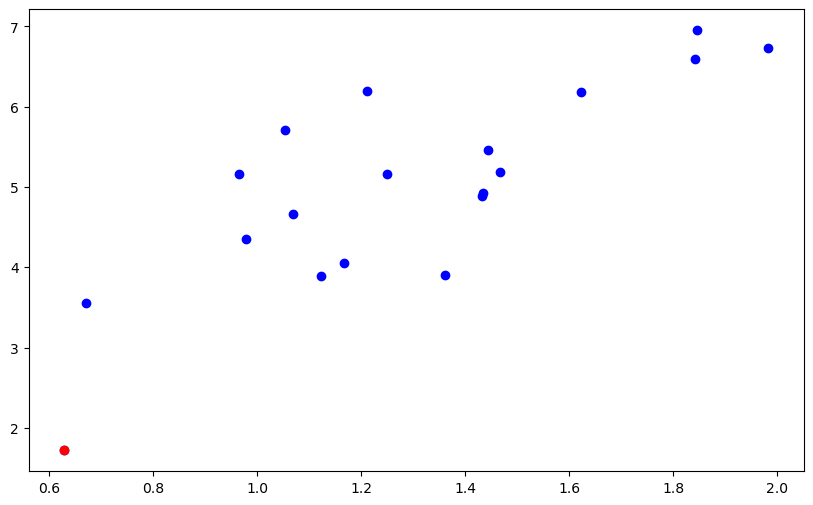

In [197]:
# 3.3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
# A scatter plot is created to visualize the outliers based on GDP per capita and 
# happiness score.
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score
              
outliers = df1[(df1['Log GDP per capita'] < lower_bound_gdp) | 
               (df1['Log GDP per capita'] > upper_bound_gdp) |
               (df1['score'] < lower_bound_score) |
               (df1['score'] > upper_bound_score)]

plt.figure(figsize=(10, 6))

plt.scatter(df1['Log GDP per capita'], df1['score'], color='blue', label='Countries')


plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')

In [199]:
# Task - 4 - Exploring Trends Across Metrics:
# Tasks:
# 4.1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
# Pearson correlations between the happiness score and two metrics ('Freedom to 
# Make Life Choices' and 'Generosity') are calculated for South Asia.
corr_freedom_score = df1['Freedom to make life choices'].corr(df1['score'])
corr_generosity_score = df1['Generosity'].corr(df1['score'])

print(f"correlation between Freedom to Make Life Choices and Score: {corr_freedom_score}")
print(f"correlation between Generosity and Score: {corr_generosity_score}")

correlation between Freedom to Make Life Choices and Score: 0.7598588415932604
correlation between Generosity and Score: 0.18514974553553173


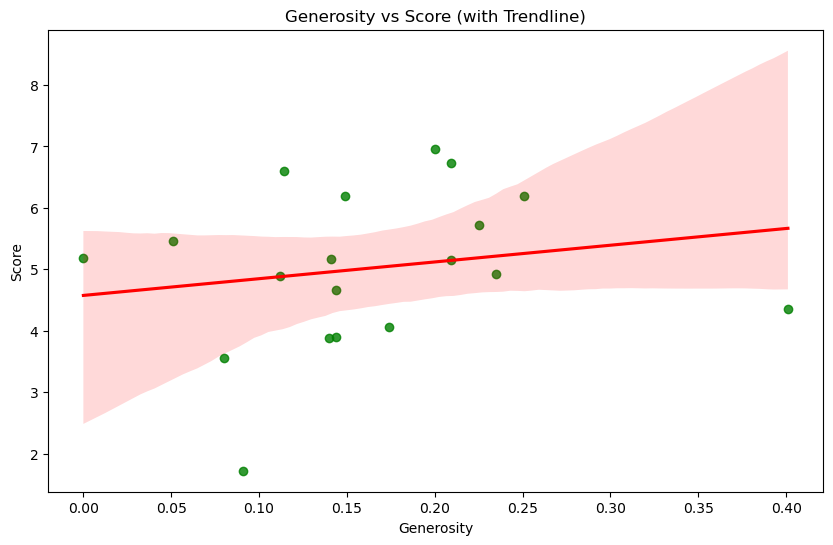

In [202]:
# 4.2. Create scatter plots with trendlines for these metrics against the Score.
# Scatter plots with regression lines are generated to visualize the relationships 
# between Generosity and Happiness Score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=df1, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Generosity vs Score (with Trendline)')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

In [204]:
# 4.3 Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
# Using if else loop to find out the strongest and weakest correlation with score. 
if corr_generosity_score > 0.8:
    print("Generosity has a strong positive correlation with Score.")
elif corr_generosity_score < -0.8:
    print("Generosity has a strong negative correlation with Score.")
else:
    print("Generosity has a weak or no correlation with Score.")

Generosity has a weak or no correlation with Score.


In [207]:
# Task - 5 - Gap Analysis:
# Tasks:
# 5.1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
# A new column GDP-Score Gap is created to represent the difference between 
# GDP per capita and happiness score for South Asian countries.
df1['GDP-Score Gap'] = df1['Log GDP per capita'] - df1['score']

print(df1)

             Country name  score  Log GDP per capita  Social support  \
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
46             Uzbekistan  6.195               1.212           1.394   
48             Kazakhstan  6.188               1.622           1.457   
74             Kyrgyzstan  5.714               1.054           1.477   
81                Armenia  5.455               1.444           1.154   
87             Tajikistan  5.281                 NaN             NaN   
90                Georgia  5.185               1.467           0.990   
91                   Iraq  5.166               1.249           0.996   
92                  Nepal  5.158               0.965           0.990   
99                   Iran  4.923               1.435           1.136   
100            Azerbaijan  4.893               1.433           0

In [209]:
# 5.2 Rank the South Asian countries by this gap in both ascending and descending order.
# Countries are ranked in both ascending and descending order based on the GDP
# Score Gap.
# ascending order
ascending_rank = df1.sort_values(by='GDP-Score Gap', ascending=True)

# descending order
descending_rank = df1.sort_values(by='GDP-Score Gap', ascending=False)

print("Ranked by GDP-Score Gap (Ascending Order):")
print(ascending_rank[['Country name', 'GDP-Score Gap']])

print("\nRanked by GDP-Score Gap (Descending Order):")
print(descending_rank[['Country name', 'GDP-Score Gap']])

Ranked by GDP-Score Gap (Ascending Order):
             Country name  GDP-Score Gap
12                 Kuwait         -5.106
46             Uzbekistan         -4.983
27           Saudi Arabia         -4.752
21   United Arab Emirates         -4.750
74             Kyrgyzstan         -4.660
48             Kazakhstan         -4.566
92                  Nepal         -4.193
81                Armenia         -4.011
91                   Iraq         -3.917
90                Georgia         -3.718
107              Pakistan         -3.588
99                   Iran         -3.488
100            Azerbaijan         -3.460
117               Myanmar         -3.376
132                 Yemen         -2.890
125                 India         -2.888
128            Bangladesh         -2.764
127             Sri Lanka         -2.537
142           Afghanistan         -1.093
87             Tajikistan            NaN

Ranked by GDP-Score Gap (Descending Order):
             Country name  GDP-Score Gap
142       

    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628           0.000   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                         0.000       0.091   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   
127                      0.031                0.014                Low   
128                      0.167                0.919                Low   

     Composite Score  Rank  Composite score Rank  Original score Rank  \
142           0.9010    19                    19                   20   
127    

C:\Users\Xblade\AppData\Local\Temp\ipykernel_9636\2291793377.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, palette='coolwarm')


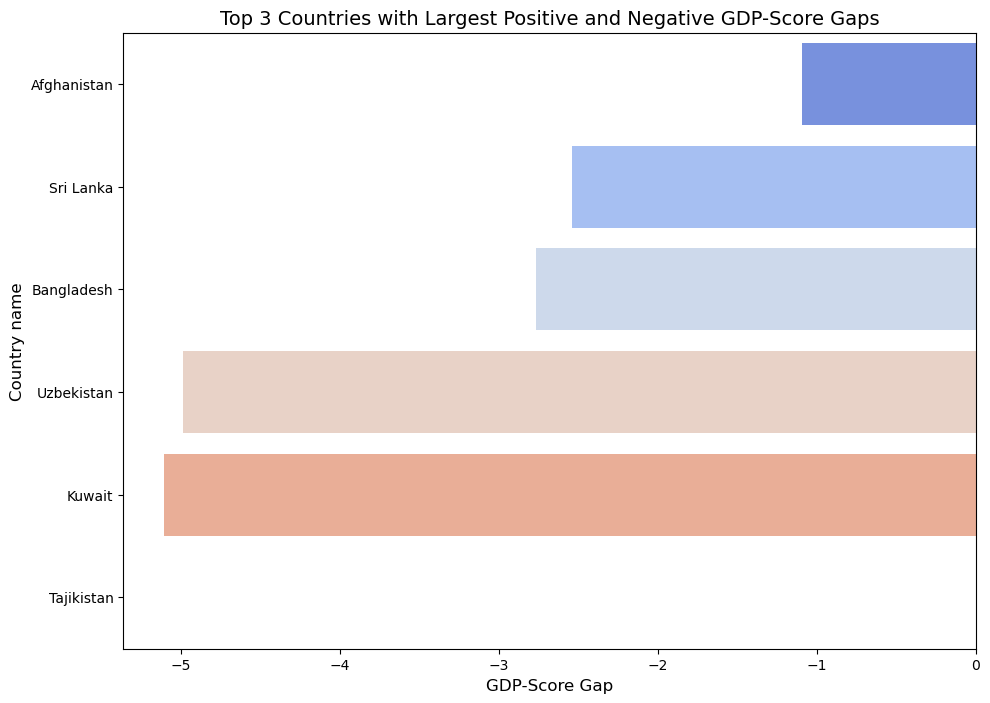

In [211]:
# 5.3.  Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
# A bar chart is created to highlight the top 3 countries with the largest positive and 
# negative GDP-Score Gaps. 
sorted_df = df1.sort_values(by='GDP-Score Gap', ascending=False)

top_positive_gaps = sorted_df.head(3)
top_negative_gaps = sorted_df.tail(3)

print(top_positive_gaps)
print(top_negative_gaps)

top_gaps = pd.concat([top_positive_gaps[['Country name', 'GDP-Score Gap']], top_negative_gaps[['Country name', 'GDP-Score Gap']]])

plt.figure(figsize=(11, 8))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, palette='coolwarm')

plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps', fontsize=14)
plt.xlabel('GDP-Score Gap', fontsize=12)
plt.ylabel('Country name', fontsize=12)
plt.show()

In [213]:
# 3.3 Problem - 3 - Comparative Analysis:
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# Tasks:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries.

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

df2 = df[df['Country name'].isin(middle_east_countries)]

df2

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [215]:
# Complete the following task:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# The mean and standard deviation of the happiness score are calculated for both 
# South Asia and the Middle East. A comparison is made to determine which region 
# has a higher average happiness score. 
# • Which region has higher happiness Scores on average?
# The dataset is filtered to include only countries from the Middle East. 
# The mean and standard deviation of the happiness score are calculated for both 
# South Asia and the Middle East. A comparison is made to determine which region 
# has a higher average happiness score.
mean_sa = df1['score'].mean()
std_sa = df1['score'].std()

mean_me = df2['score'].mean()
std_me= df2['score'].std()

print("South Asia - Mean Score:", mean_sa)
print("South Asia - Standard Deviation:", std_sa)

print("\nMiddle East - Mean Score:", mean_me)
print("Middle East - Standard Deviation:", std_me)

if mean_sa > mean_me:
    print("\nSouth Asia has a higher average happiness score.")
else:
    print("\nMiddle East has a higher average happiness score.")

South Asia - Mean Score: 5.0283500000000005
South Asia - Standard Deviation: 1.2519788242281853

Middle East - Mean Score: 5.412100000000001
Middle East - Standard Deviation: 1.5662011684327144

Middle East has a higher average happiness score.


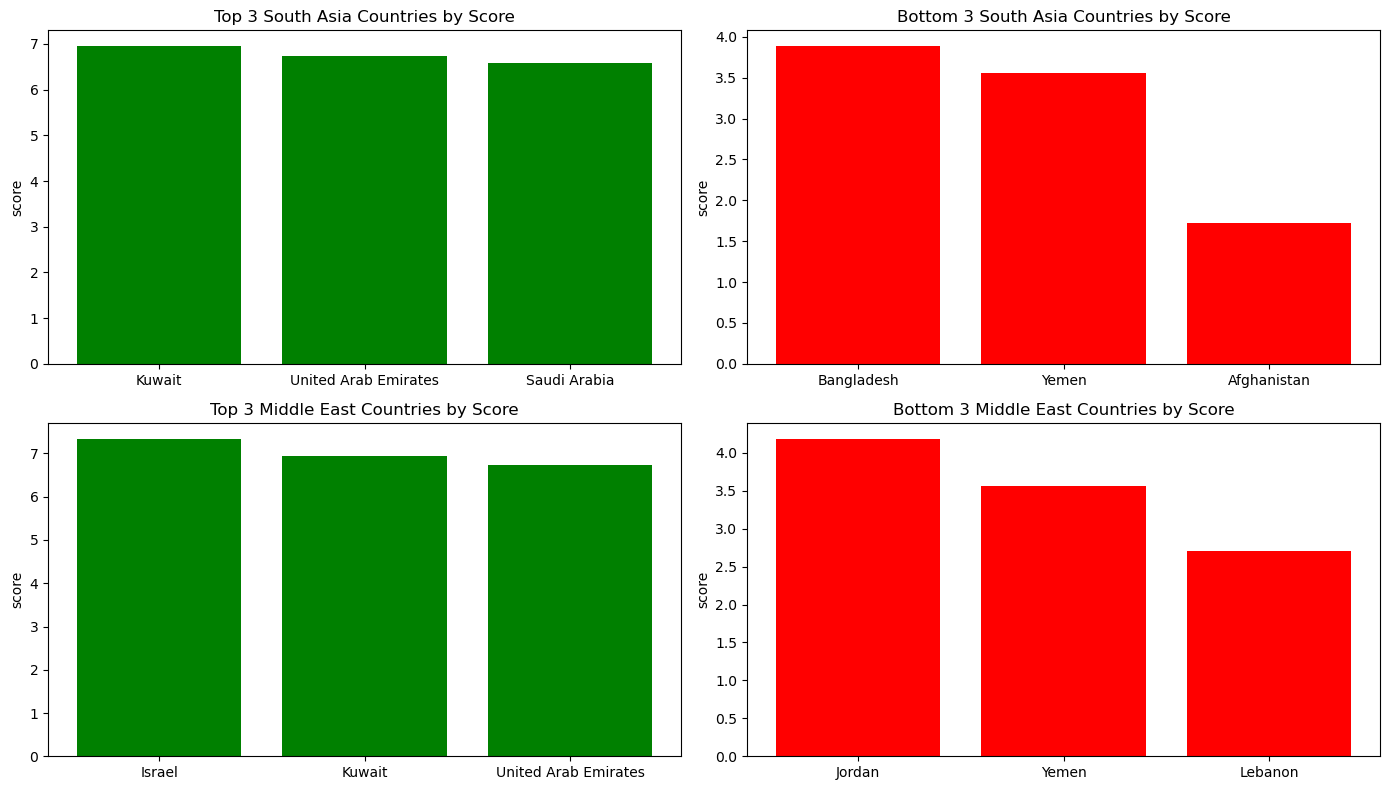

In [217]:
# Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.
# • Plot bar charts comparing these charts.
# The top 3 and bottom 3 countries from both regions (South Asia and Middle East) 
# are identified based on their happiness scores. 
# Bar charts are created to compare the top 3 and bottom 3 countries in both regions.
df_south_asia_sorted = df1.sort_values(by='score', ascending=False)
df_middle_east_sorted = df2.sort_values(by='score', ascending=False)

top_3_south_asia = df_south_asia_sorted.head(3)
bottom_3_south_asia = df_south_asia_sorted.tail(3)

top_3_middle_east = df_middle_east_sorted.head(3)
bottom_3_middle_east = df_middle_east_sorted.tail(3)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Top 3 South Asia
axes[0, 0].bar(top_3_south_asia['Country name'], top_3_south_asia['score'], color='green')
axes[0, 0].set_title('Top 3 South Asia Countries by Score')
axes[0, 0].set_ylabel('score')

# Bottom 3 South Asia
axes[0, 1].bar(bottom_3_south_asia['Country name'], bottom_3_south_asia['score'], color='red')
axes[0, 1].set_title('Bottom 3 South Asia Countries by Score')
axes[0, 1].set_ylabel('score')

# Top 3 Middle East
axes[1, 0].bar(top_3_middle_east['Country name'], top_3_middle_east['score'], color='green')
axes[1, 0].set_title('Top 3 Middle East Countries by Score')
axes[1, 0].set_ylabel('score')

# Bottom 3 Middle East
axes[1, 1].bar(bottom_3_middle_east['Country name'], bottom_3_middle_east['score'], color='red')
axes[1, 1].set_title('Bottom 3 Middle East Countries by Score')
axes[1, 1].set_ylabel('score')

# Adjust layout and display
plt.tight_layout()
plt.show()

C:\Users\Xblade\AppData\Local\Temp\ipykernel_9636\331914336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Region'] = 'Middle East'


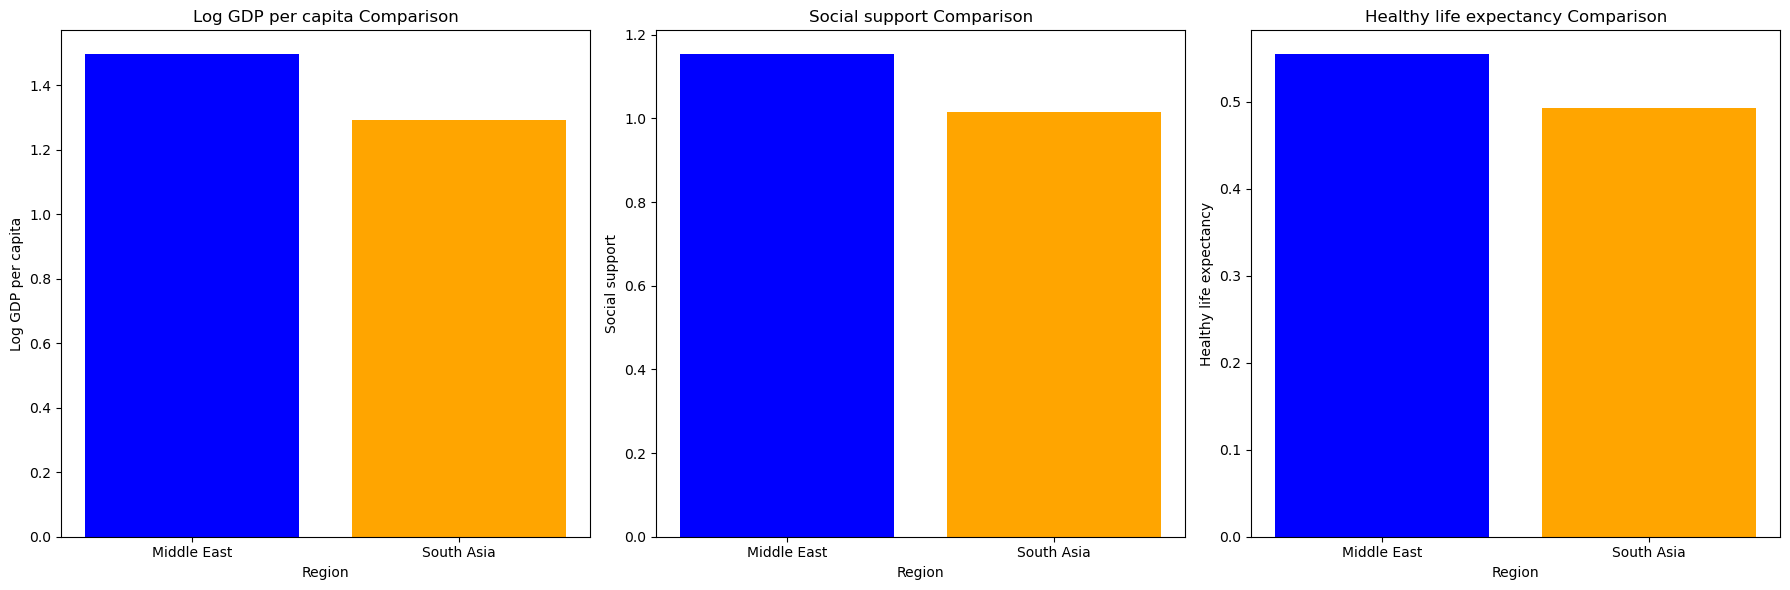

In [218]:
# Metric Comparisons:
# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
# Grouped bar charts are created to compare the average GDP per Capita, Social 
# Support, and Healthy Life Expectancy between South Asia and the Middle East. 
# • Which metrics show the largest disparity between the two regions?
# From the below bar charts, we can see that Log GDP per capita show the largest 
# disparity between two regions. 
df1['Region'] = 'South Asia'
df2['Region'] = 'Middle East'
df_combined = pd.concat([df1, df2])

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    metric_data = df_combined.groupby(['Region'])[metric].mean()

    axes[i].bar(metric_data.index, metric_data.values, color=['blue', 'orange'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Region')

plt.tight_layout()
plt.show()

In [219]:
# Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# The range (max - min) and coefficient of variation (CV) of the happiness scores 
# are calculated for both regions. A comparison is made to understand which region 
# has more variability in happiness scores. 
# • Which region has greater variability in happiness?
# From the below figure we can see that the coefficient of variation of Middle East is 
# greater than the south east countries. Perhaps, the variability in happiness of Middle East 
# is greater than south east. 
range_sa = df1['score'].max() - df1['score'].min()
mean_sa = df1['score'].mean()
std_sa = df1['score'].std()
cv_sa= std_sa / mean_sa

range_me = df2['score'].max() - df2['score'].min()
mean_me = df2['score'].mean()
std_me = df2['score'].std()
cv_me = std_me/ mean_me

print("South Asia - Range:", range_sa)
print("South Asia - Coefficient of Variation (CV):", cv_sa)

print("\nMiddle East - Range:", range_me)
print("Middle East - Coefficient of Variation (CV):", cv_me)

South Asia - Range: 5.2299999999999995
South Asia - Coefficient of Variation (CV): 0.24898402542149714

Middle East - Range: 4.634
Middle East - Coefficient of Variation (CV): 0.28938880812119405


South Asia - Correlation between Score and Freedom to Make Life Choices: 0.7598588415932603
South Asia - Correlation between Score and Generosity: 0.1851497455355317
Middle East - Correlation between Score and Freedom to Make Life Choices: 0.8632202433827544
Middle East - Correlation between Score and Generosity: 0.6275236536964182


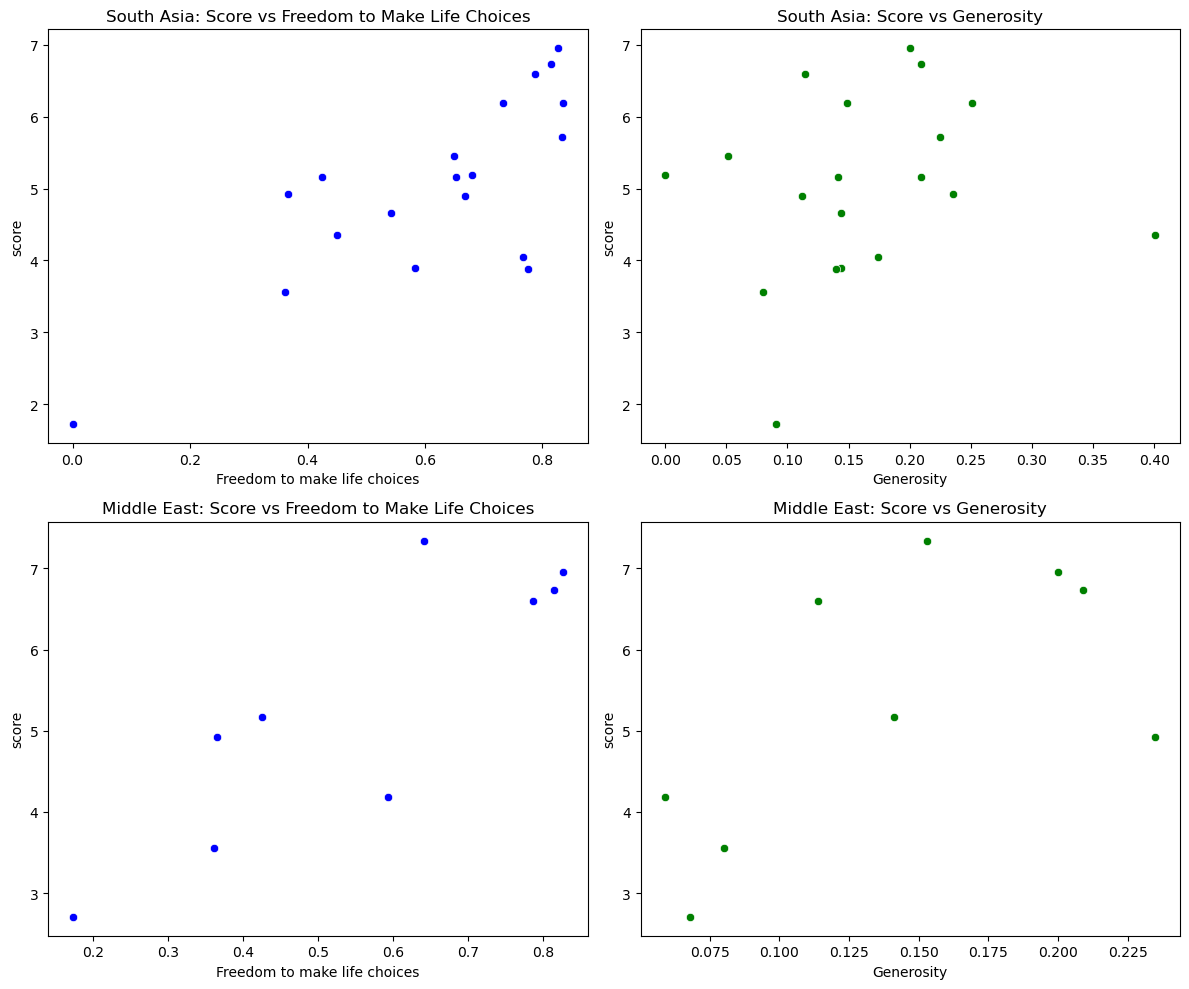

In [221]:
# Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.
# The correlation between happiness scores and two metrics ('Freedom to Make Life 
# Choices' and 'Generosity') is calculated for both regions. 
# • Create scatter plots to visualize and interpret the relationships.
# Scatter plots are created for each region to visualize the relationships between 
# these metrics and happiness scores.
corr_sa_freedom = df1['score'].corr(df1['Freedom to make life choices'])
corr_sa_generosity = df1['score'].corr(df1['Generosity'])

corr_me_freedom = df2['score'].corr(df2['Freedom to make life choices'])
corr_me_generosity = df2['score'].corr(df2['Generosity'])

print(f"South Asia - Correlation between Score and Freedom to Make Life Choices: {corr_sa_freedom}")
print(f"South Asia - Correlation between Score and Generosity: {corr_sa_generosity}")
print(f"Middle East - Correlation between Score and Freedom to Make Life Choices: {corr_me_freedom}")
print(f"Middle East - Correlation between Score and Generosity: {corr_me_generosity}")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for South Asia: Score vs Freedom
sns.scatterplot(data=df1, x='Freedom to make life choices', y='score', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('South Asia: Score vs Freedom to Make Life Choices')

# Scatter plot for South Asia: Score vs Generosity
sns.scatterplot(data=df1, x='Generosity', y='score', ax=axes[0, 1], color='green')
axes[0, 1].set_title('South Asia: Score vs Generosity')

# Scatter plot for Middle East: Score vs Freedom
sns.scatterplot(data=df2, x='Freedom to make life choices', y='score', ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Middle East: Score vs Freedom to Make Life Choices')

# Scatter plot for Middle East: Score vs Generosity
sns.scatterplot(data=df2, x='Generosity', y='score', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Middle East: Score vs Generosity')


plt.tight_layout()
plt.show()

South Asia Outliers based on Score:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category, Composite Score, Rank, Composite score Rank, Original score Rank, GDP-Score Gap, Region]
Index: []

South Asia Outliers based on GDP per Capita:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category, Composite Score, Rank, Composite score Rank, Original score Rank, GDP-Score Gap, Region]
Index: []

Middle East Outliers based on Score:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category, Region]
Index: []

Middle Ea

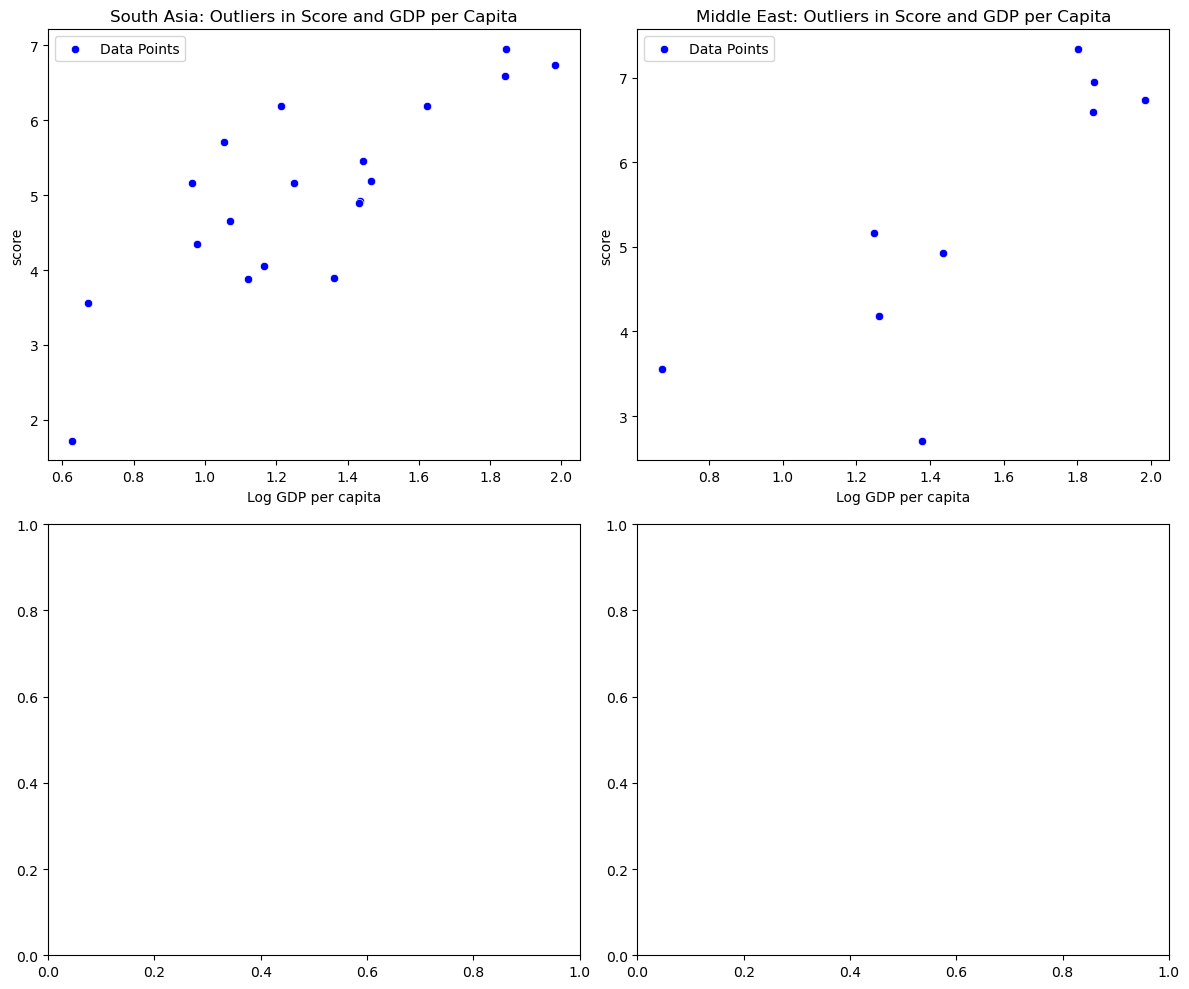

In [222]:
#  Outlier Detection:
# • Identify outlier countries in both regions based on Score and GDP per Capita.
# The correlation between happiness scores and two metrics ('Freedom to Make Life 
# Choices' and 'Generosity') is calculated for both regions.
# • Plot these outliers and discuss their implications.
# Scatter plots are created for each region to visualize the relationships between 
# these metrics and happiness scores.

def detect_outliers(df, column_name, iqr_multiplier=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

# Detect outliers for both regions with a more relaxed IQR multiplier
outliers_sa_score = detect_outliers(df1, 'score', iqr_multiplier=2.5)
outliers_sa_gdp = detect_outliers(df1, 'Log GDP per capita', iqr_multiplier=2.5)

outliers_me_score = detect_outliers(df2, 'score', iqr_multiplier=2.5)
outliers_me_gdp = detect_outliers(df2, 'Log GDP per capita', iqr_multiplier=2.5)

# Check outliers for debugging
print("South Asia Outliers based on Score:")
print(outliers_sa_score)

print("\nSouth Asia Outliers based on GDP per Capita:")
print(outliers_sa_gdp)

print("\nMiddle East Outliers based on Score:")
print(outliers_me_score)

print("\nMiddle East Outliers based on GDP per Capita:")
print(outliers_me_gdp)

# Plotting outliers on scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for South Asia
sns.scatterplot(data=df1, x='Log GDP per capita', y='score', ax=axes[0, 0], color='blue', label='Data Points')
if not outliers_sa_score.empty:
    sns.scatterplot(data=outliers_sa_score, x='Log GDP per capita', y='score', ax=axes[0, 0], color='red', label='Score Outliers')
if not outliers_sa_gdp.empty:
    sns.scatterplot(data=outliers_sa_gdp, x='Log GDP per capita', y='score', ax=axes[0, 0], color='green', label='GDP Outliers')
axes[0, 0].set_title('South Asia: Outliers in Score and GDP per Capita')
axes[0, 0].legend()

# Scatter plot for Middle East
sns.scatterplot(data=df2, x='Log GDP per capita', y='score', ax=axes[0, 1], color='blue', label='Data Points')
if not outliers_me_score.empty:
    sns.scatterplot(data=outliers_me_score, x='Log GDP per capita', y='score', ax=axes[0, 1], color='red', label='Score Outliers')
if not outliers_me_gdp.empty:
    sns.scatterplot(data=outliers_me_gdp, x='Log GDP per capita', y='score', ax=axes[0, 1], color='green', label='GDP Outliers')
axes[0, 1].set_title('Middle East: Outliers in Score and GDP per Capita')
axes[0, 1].legend()

plt.tight_layout()
plt.show()


C:\Users\Xblade\AppData\Local\Temp\ipykernel_9636\244583687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Region'] = 'Middle East'
C:\Users\Xblade\AppData\Local\Temp\ipykernel_9636\244583687.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=df_comparison, palette="Set2")


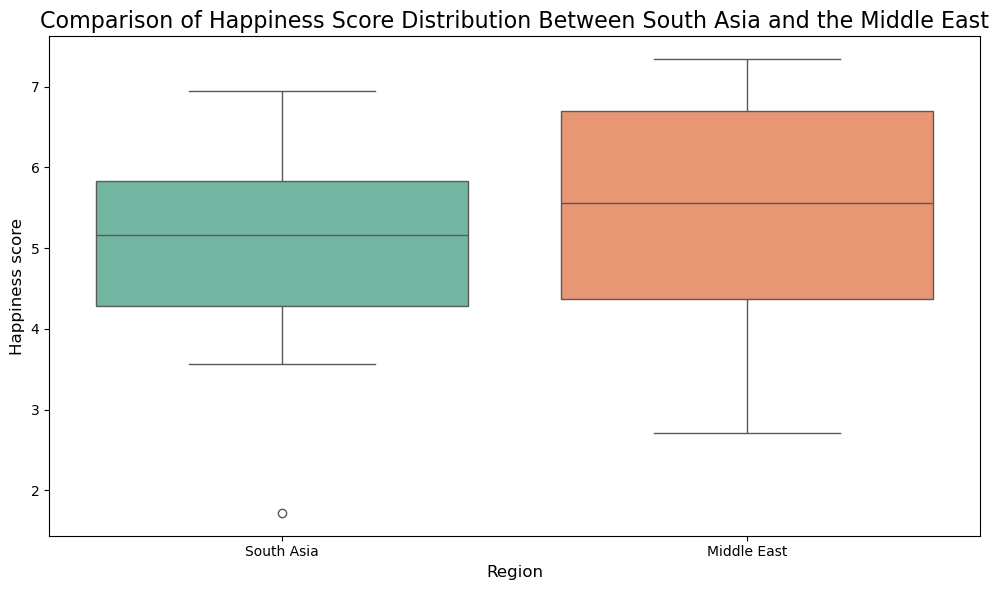

In [225]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
# Outliers are detected for both regions based on their happiness score and GDP 
# per capita.
# • Interpret the key differences in distribution shapes, medians, and outliers.
# A scatter plot is created to visualize the outliers.
df1['Region'] = 'South Asia'
df2['Region'] = 'Middle East'

df_comparison = pd.concat([df1[['score', 'Region']], df2[['score', 'Region']]])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=df_comparison, palette="Set2")

plt.title('Comparison of Happiness Score Distribution Between South Asia and the Middle East', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness score', fontsize=12)

plt.tight_layout()
plt.show()